In [1]:
!git clone https://BatyshchevKirill@github.com/BatyshchevKirill/text-detoxification.git
# !pip install -r /kaggle/working/text-detoxification/requirements.txt

Cloning into 'text-detoxification'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 308 (delta 133), reused 215 (delta 74), pack-reused 5
Receiving objects: 100% (308/308), 55.62 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [2]:
import sys

BASE_PATH = "/kaggle/working/text-detoxification"
sys.path.append(BASE_PATH)

In [4]:
from src.data.make_dataset import ToxicDataset, TransformerLoaderCreator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
dataset = ToxicDataset(BASE_PATH + '/data/interim/preprocessed_data.csv', max_vocab_size=10000,
                      vocab_path=BASE_PATH+'/data/interim/vocab.pth', load_pretrained=True)

100%|██████████| 338647/338647 [01:55<00:00, 2933.07it/s]


In [5]:
trainloader, valloader =  TransformerLoaderCreator(dataset, batch_size=32, max_len=128, random_state=33)()

In [10]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_path = BASE_PATH + '/models/transformer_checkpoints/'
os.makedirs(save_path, exist_ok=True)
epochs = 30
lr = 3e-4
batch_size = 64
vocab_size = len(dataset.vocab)
emb_dim = 512
heads = 8
enc_layers = 3
dec_layers = 3
dropout = 0.1
max_len = 128
hidden_dim = 4

writer = SummaryWriter("runs/loss_plot")
step = 0

In [8]:
from src.models.transformer import Transformer

model = Transformer( emb_dim, vocab_size, heads, enc_layers, dec_layers, hidden_dim, dropout, max_len, device).to(device)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [1]:
from src.models.train_model import train_transformer

train_transformer(model, save_path, lr, epochs, trainloader, valloader)


Epoch 1/20
100%|██████████| 2117/2117 [01:03<00:00, 33.50it/s]
 Val_loss: 2.780249144876685
Epoch 2/20
100%|██████████| 2117/2117 [01:03<00:00, 33.58it/s]
 Val_loss: 2.5666731936671456
Epoch 3/20
100%|██████████| 2117/2117 [01:03<00:00, 33.48it/s]
 Val_loss: 2.4472393988999883
Epoch 4/20
100%|██████████| 2117/2117 [01:03<00:00, 33.58it/s]
 Val_loss: 2.380344381803153
Epoch 5/20
100%|██████████| 2117/2117 [01:03<00:00, 33.39it/s]
 Val_loss: 2.3399776029429122
Epoch 6/20
100%|██████████| 2117/2117 [01:03<00:00, 33.48it/s]
 Val_loss: 2.3041347645902386
Epoch 7/20
100%|██████████| 2117/2117 [01:03<00:00, 33.46it/s]
 Val_loss: 2.255895642948196
Epoch 8/20
100%|██████████| 2117/2117 [01:03<00:00, 33.37it/s]
 Val_loss: 2.242783937524049
Epoch 9/20
100%|██████████| 2117/2117 [01:02<00:00, 33.89it/s]
 Val_loss: 2.226251226525629
Epoch 10/20
100%|██████████| 2117/2117 [01:02<00:00, 33.91it/s]
 Val_loss: 2.20164260720103
Epoch 11/20
100%|██████████| 2117/2117 [01:02<00:00, 33.93it/s]
 Val_loss: 

In [3]:
from src.visualization.visualize import plot_loss

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


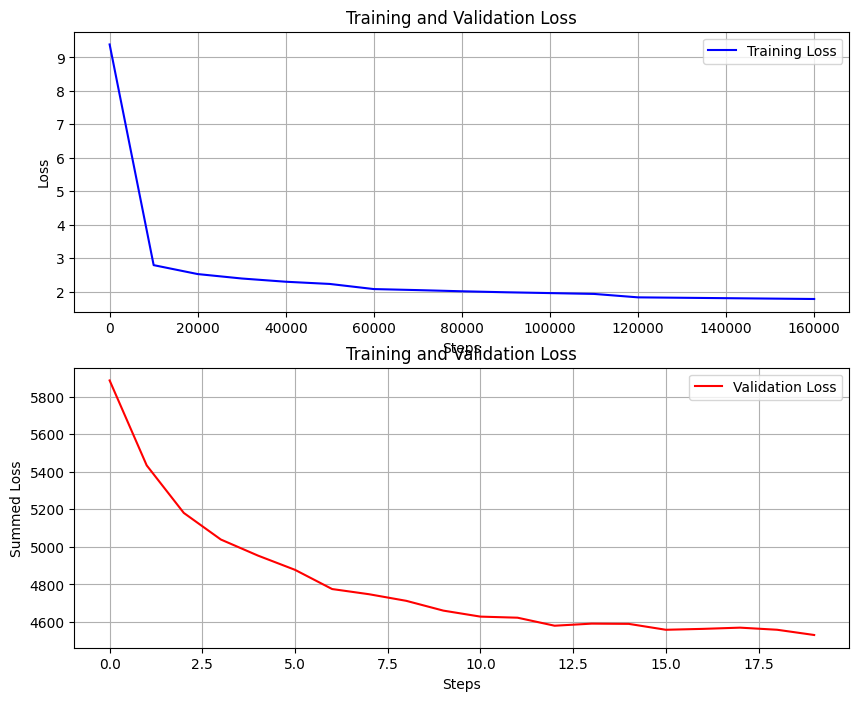

In [6]:
plot_loss("/kaggle/working/runs/loss_plot/events.out.tfevents.1699185566.ead094bda3fa.26.0", step=100)